In [2]:
import Functions as F
import importlib
import time
import matplotlib.pyplot as plt
import numpy as np

# Exercise 2 Low-activity patterns
## Exercise 2.1

### Comparaison of the two models  
The input for the classical model is : $h_{i}(t)= \sum_{j}{w_{ij}S_{j}(t)}$

If we take $S_{i}(t)=2\sigma_{i}-1$, 

We can find the input for a low activity patterns :

 $h_{i}(t)= \sum_{j}{w_{ij}\sigma_{j}(t)}-\theta$, with $w_{ij}=c/N \sum_{j}{(\xi_{i}^{\mu}-b)(\xi_{j}^{\mu}-a)}$

 This model is approximately equivalent to the standard one if $a=b=0.5$ (symmetric model) and $\theta=\sum_{j}w_{ij}$

The model is exactly equivalent to the standard model (upon averaging over the stochastic update), only if the means activities of the patterns are zero. Therefore, we have $\theta = 0$

# Exercise 2.2

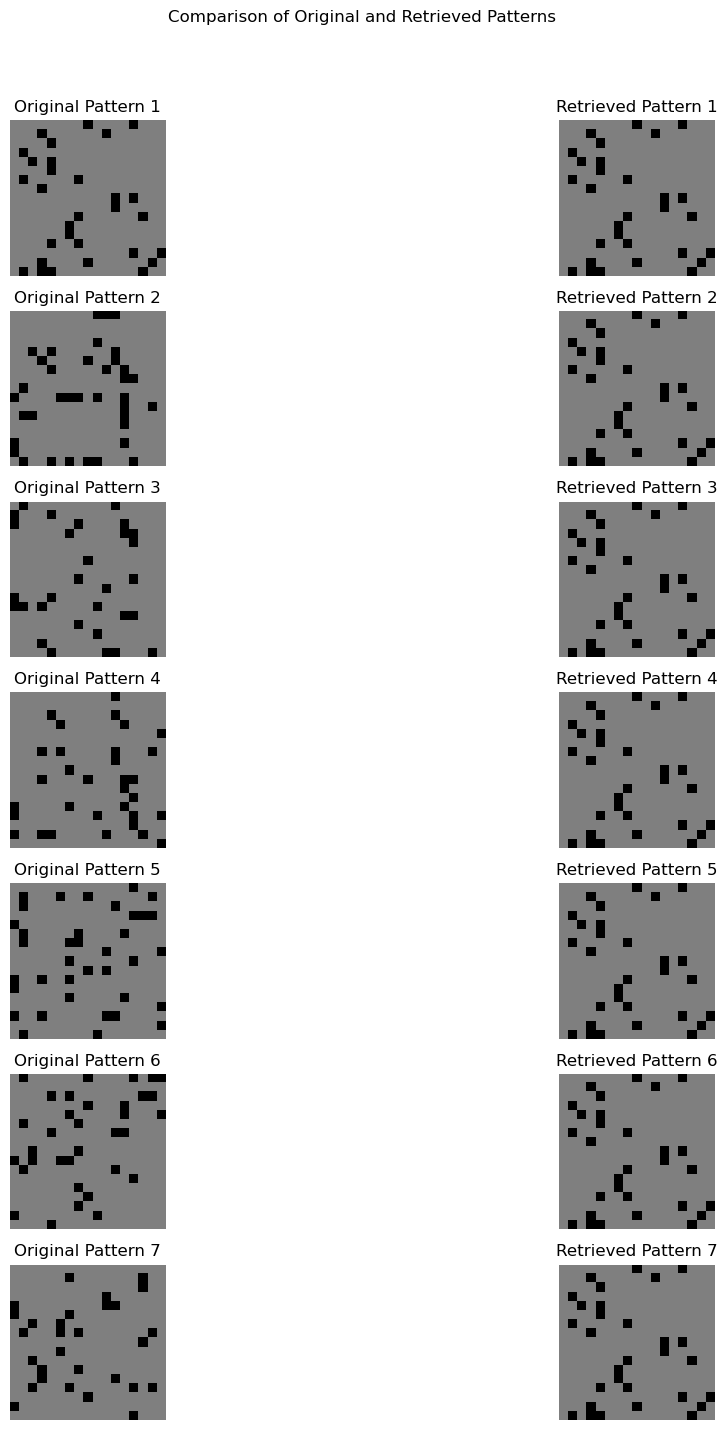

In [48]:
importlib.reload(F)
N=289 #neurons
M=7 #patterns
a=0.1
b=0.1
beta=4
c=2/(a*(1-a))
T=20
patterns=F.generate_low_activity_patterns(N,M,a)
initial_state = F.flip_bits_V1(patterns[0], c=0.15)

weight=F.compute_weight_matrix(patterns,N,a,b)
#theta =np.sum(weight)
theta=1
S=initial_state

for t in range(T):
            overlaps = F.compute_overlaps(patterns, S,a)
            S = F.update_states_with_overlaps(patterns, overlaps,theta, beta,b)
            S = np.array([F.stochastic_spike_variable(si) for si in S])


fig, ax = plt.subplots(nrows=M, ncols=2, figsize=(15, 15))
    # Display the original pattern
for i in range(M):
    ax[i, 0].imshow(patterns[i].reshape(17,17), cmap='binary', vmin=-1, vmax=1)
    ax[i, 0].set_title(f'Original Pattern {i+1}')
    ax[i, 0].axis('off')  # Hide grid lines and ticks for clarity
    # Display the retrieved pattern
    ax[i, 1].imshow(S.reshape(17,17), cmap='binary', vmin=-1, vmax=1)
    ax[i, 1].set_title(f'Retrieved Pattern {i+1}')
    ax[i, 1].axis('off')  # Hide grid lines and ticks for clarity
plt.suptitle("Comparison of Original and Retrieved Patterns")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("Ex0.2_pattern_retrieval.png", )
plt.show()


In [9]:
importlib.reload(F)
N = 300  # neurons
M = 5  # patterns
a = 0.5  # activity level
b = 0.5 # parameter for weight calculation
theta = [0]  # neuronal firing threshold
beta = 4  # inverse temperature
T = 20   # time steps

final_state = F.run_simulation_low_activity(N, M, a, b, theta, beta, T)
print(final_state)

([0], [0.0])


# Exercice 2.3

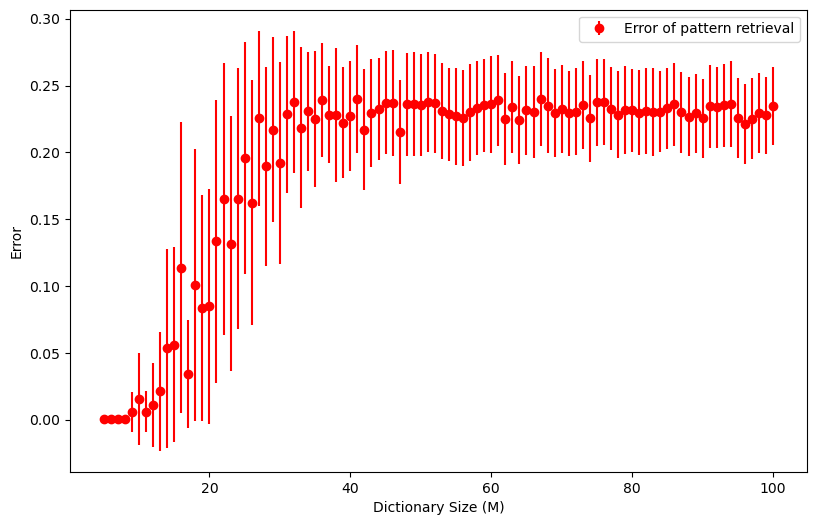

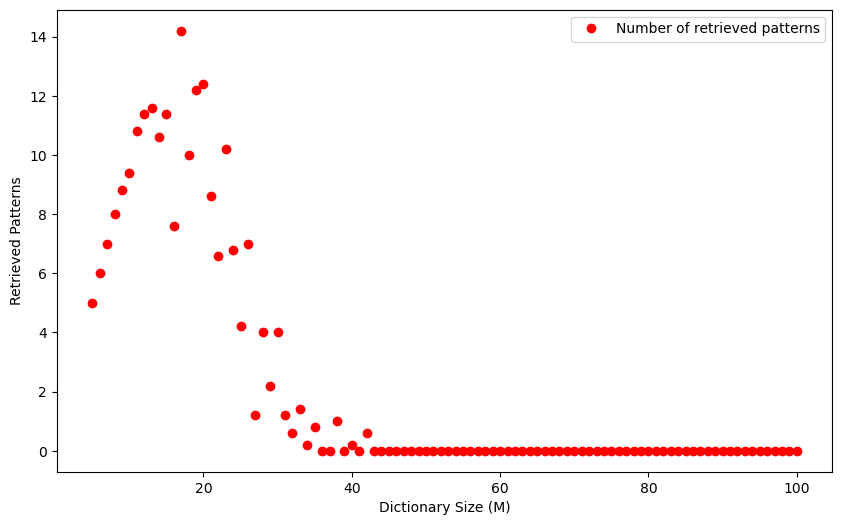

In [49]:
importlib.reload(F)
dict_sizes = range(5, 101, 1)  # Example range
errors = []
stds = []
retrievals = []
a=0.5
theta=0
for M in dict_sizes:
    mean_error, std_error, avg_retrieved = F.run_low_activity_simulation_dictionary(M, a,theta)
    errors.append(mean_error)
    stds.append(std_error)
    retrievals.append(avg_retrieved)

# Plotting the results
plt.figure(figsize=(9.5,6))
plt.errorbar(dict_sizes, errors, yerr=stds, fmt='ro', label='Error of pattern retrieval')
plt.xlabel('Dictionary Size (M)')
plt.ylabel('Error')
plt.legend()
plt.savefig("./Figures/error_of_retrieval_pattern_low.png")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(dict_sizes, retrievals, 'ro', label='Number of retrieved patterns')
plt.xlabel('Dictionary Size (M)')
plt.ylabel('Retrieved Patterns')
plt.legend()
plt.savefig("./Figures/number_of_retrieved_pattern_low.png")
plt.show()

The network capacity for N=300 is: $C=M_{max}/N=10/300$

# Exercice 2.4

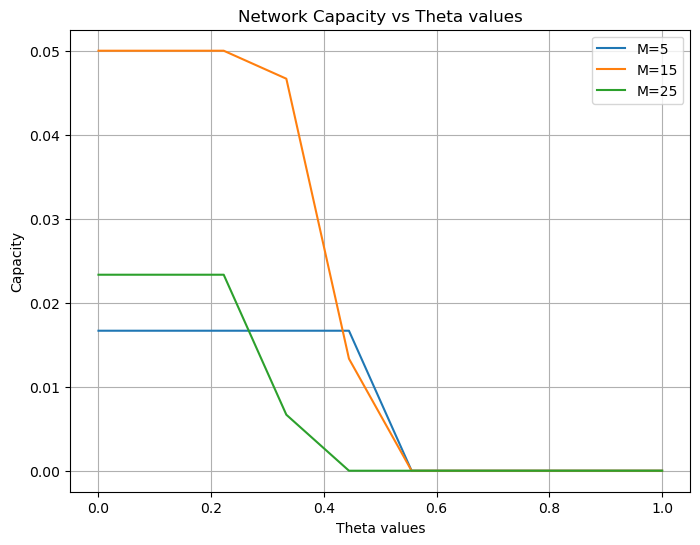

In [46]:
importlib.reload(F)
# Ex 2.4 Find the threshold θ that corresponds to the best capacity for a=b=0.5
# This involves running simulations over a range of θ values and observing which one results in the highest capacity.

N = 300  # Number of neurons
M_values=range(5, 31, 10)   # Number of patterns
a = 0.5  # Activity level
b=0.5
theta_values = np.linspace(0,1, 10)  # Range of theta values to test
beta = 4  # Inverse temperature
T = 20   # Time steps

F.capacity_study_theta(N,M_values,a,b, theta_values, trials=10)


# Exercice 2.5

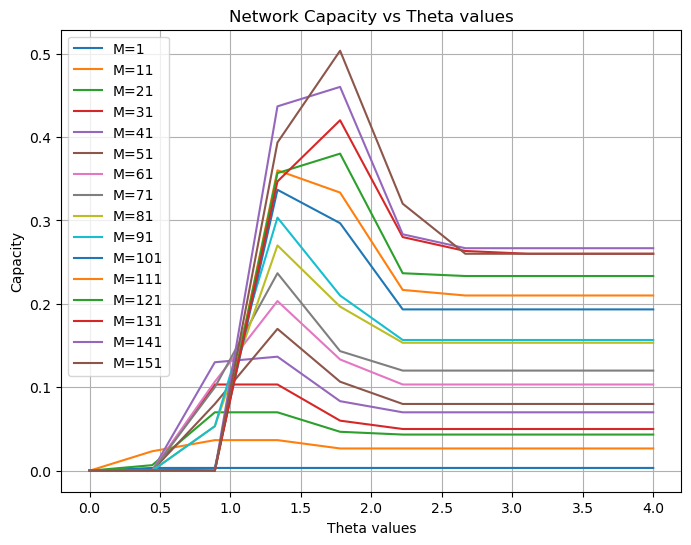

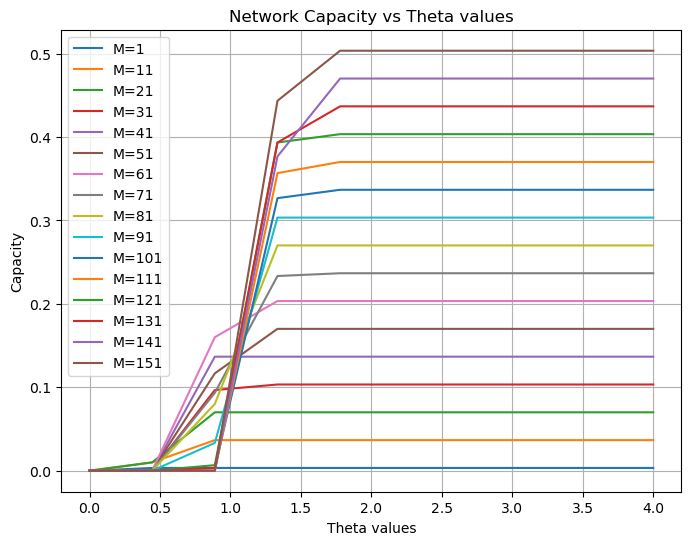

In [47]:
importlib.reload(F)
# Ex 2.5 Repeat for different values of a and b for low-activity cases

N = 300  # Number of neurons
M_values=range(1, 161, 10)   # Number of patterns
a = 0.1  # Activity level
b=0.1

#M=20
theta_values = np.linspace(0,4, 10)  # Range of theta values to test
beta = 4  # Inverse temperature
T = 20   # Time steps

F.capacity_study_theta(N,M_values,a,b, theta_values,trials=10)

N = 300  # Number of neurons
M_values=range(1, 161, 10)   # Number of patterns
a = 0.05  # Activity level
b=0.05

#M=20
theta_values = np.linspace(0,4, 10)  # Range of theta values to test
beta = 4  # Inverse temperature
T = 20   # Time steps

F.capacity_study_theta(N,M_values,a,b, theta_values,trials=10)

# Exercice 2.6

In [38]:
importlib.reload(F)
# Ex 2.6 Experiment with asymmetric connectivities by varying the value of b
# Yet again, this would involve simulations where you vary b and measure the network's capacity, looking for the optimal combination of b and θ.
# Example simulation with specific parameters
N = 300
M = 5
activity = 0.1
theta = 0.8  # This would be varied to find the optimal value
retrieval_rate = F.simulate_capacity(N, M, activity, theta)
print(f"Retrieval rate: {retrieval_rate}")

Retrieval rate: 0.0
